In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
# Genre의 Null 값은 분석을 위해 Drop
df = df.dropna()
# Year 전처리
df['Year'] = df['Year'].apply(np.int64)
for i in range(17):
  df.loc[df['Year'] == i, 'Year'] = 2000+i
df.loc[df['Year'] < 100, 'Year'] += 1900

# 데이터가 적은 Year Drop
df_idx1 = df[df['Year']==2017].index
df_idx2 = df[df['Year']==2020].index
df = df.drop(df_idx1)
df = df.drop(df_idx2)

# 지역별 Sales 전처리
df['NA_Sales'] = df['NA_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['EU_Sales'] = df['EU_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['JP_Sales'] = df['JP_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)

# Sales 합 Column 추가
df['Sales_sum'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [ ]:
# 지역에 따라서 선호하는 게임 장르가 다를까

locate_Genre_NA = df.groupby(['Genre'])['NA_Sales'].sum()
locate_Genre_EU = df.groupby(['Genre'])['EU_Sales'].sum()
locate_Genre_JP = df.groupby(['Genre'])['JP_Sales'].sum()
locate_Genre_Other = df.groupby(['Genre'])['Other_Sales'].sum()
locate_Genre = pd.DataFrame()
locate_Genre = locate_Genre.append(locate_Genre_NA)
locate_Genre = locate_Genre.append(locate_Genre_EU)
locate_Genre = locate_Genre.append(locate_Genre_JP)
locate_Genre = locate_Genre.append(locate_Genre_Other)
locate_Genre = locate_Genre.T
locate_Genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Action,858.75,513.64,156.59,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.89,56.73
Shooter,574.48,310.23,38.18,101.86
Simulation,181.16,112.99,63.54,31.30


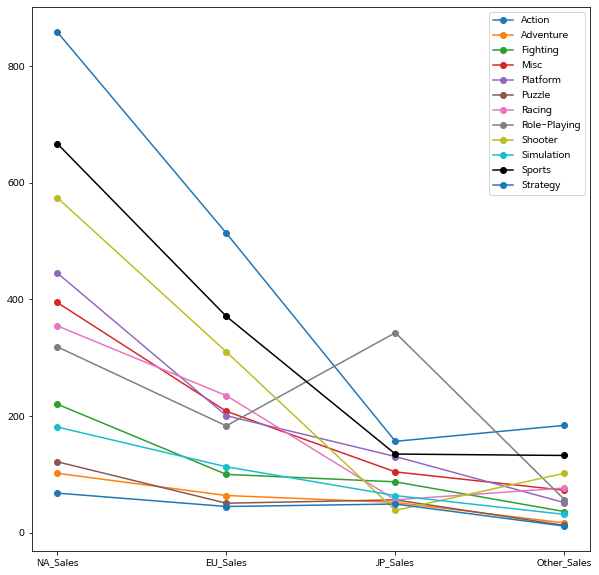

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot() 
ax.plot(locate_Genre.T['Action'],marker='o',label='Action')
ax.plot(locate_Genre.T['Adventure'],marker='o',label='Adventure')
ax.plot(locate_Genre.T['Fighting'],marker='o',label='Fighting')
ax.plot(locate_Genre.T['Misc'],marker='o',label='Misc')
ax.plot(locate_Genre.T['Platform'],marker='o',label='Platform')
ax.plot(locate_Genre.T['Puzzle'],marker='o',label='Puzzle')
ax.plot(locate_Genre.T['Racing'],marker='o',label='Racing')
ax.plot(locate_Genre.T['Role-Playing'],marker='o',label='Role-Playing')
ax.plot(locate_Genre.T['Shooter'],marker='o',label='Shooter')
ax.plot(locate_Genre.T['Simulation'],marker='o',label='Simulation')
ax.plot(locate_Genre.T['Sports'],marker='o', color='k',label='Sports') #Sports와 Action이 색깔이 비슷하게 나와 Sports만 color 따로 지정
ax.plot(locate_Genre.T['Strategy'],marker='o',label='Strategy')
ax.legend()
plt.show()
#일본의 경우 Role-Playing 나머지의 경우 Action 장르가 인기가 많은 걸 알 수 있다.

In [ ]:
#이미 위의 작업으로 지역마다 선호하는 장르가 다르다는 것을 알았지만, 신뢰성을 더하기 위해 카이제곱 검정 실시
# 귀무가설 : 지역마다 선호하는 장르가 같다.(p>0.05)
from scipy.stats import chi2_contingency
chi2_val, p, dof, expected= chi2_contingency(locate_Genre, correction=False)
if(p<0.05) : 
    print('p value:', p,"\n"+'귀무가설을 기각한다. 지역마다 선호하는 장르가 다르다.')
else :
    print('p value:', p,"\n"+'귀무가설을 기각하지 못한다. 지역마다 선호하는 장르가 같다.')

# 일본을 제외한 경우
locate_Genre2 = locate_Genre.drop(['JP_Sales'], axis=1)
chi2_val, p, dof, expected= chi2_contingency(locate_Genre2, correction=False)
if(p<0.05) : 
    print('일본을 제외한 p value:', p,"\n"+'귀무가설을 기각한다. 일본을 제외한 지역마다 선호하는 장르가 다르다.')
else :
    print('p value:', p,"\n"+'귀무가설을 기각하지 못한다. 일본을 제외한 지역마다 선호하는 장르가 같다.')

p value: 9.964279787302075e-123 
귀무가설을 기각한다. 지역마다 선호하는 장르가 다르다.
일본을 제외한 p value: 0.024080297712670003 
귀무가설을 기각한다. 일본을 제외한 지역마다 선호하는 장르가 다르다.


In [ ]:
# 연도별 게임의 트렌드가 있을까 (공급)

# 연도별 장르 갯수 추출
df_year_genre = df.groupby(['Year', 'Genre']).size().reset_index(name='Count')
# 장르 중 최댓값 추출
year_genre_bool = df_year_genre.groupby(['Year'])['Count'].transform(max) == df_year_genre['Count']
year_max_genre = df_year_genre[year_genre_bool].reset_index(drop=True)
# 중복값 제거
year_max_genre = year_max_genre.drop_duplicates(subset=['Year','Count']).reset_index(drop=True)
year_max_genre.rename(index = {'Count': 'Sales'}, inplace = True)
year_max_genre

,Year,Genre,Count
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Puzzle,3
5,1985,Platform,4
6,1986,Action,6
7,1987,Sports,4
8,1988,Platform,4
9,1989,Puzzle,5


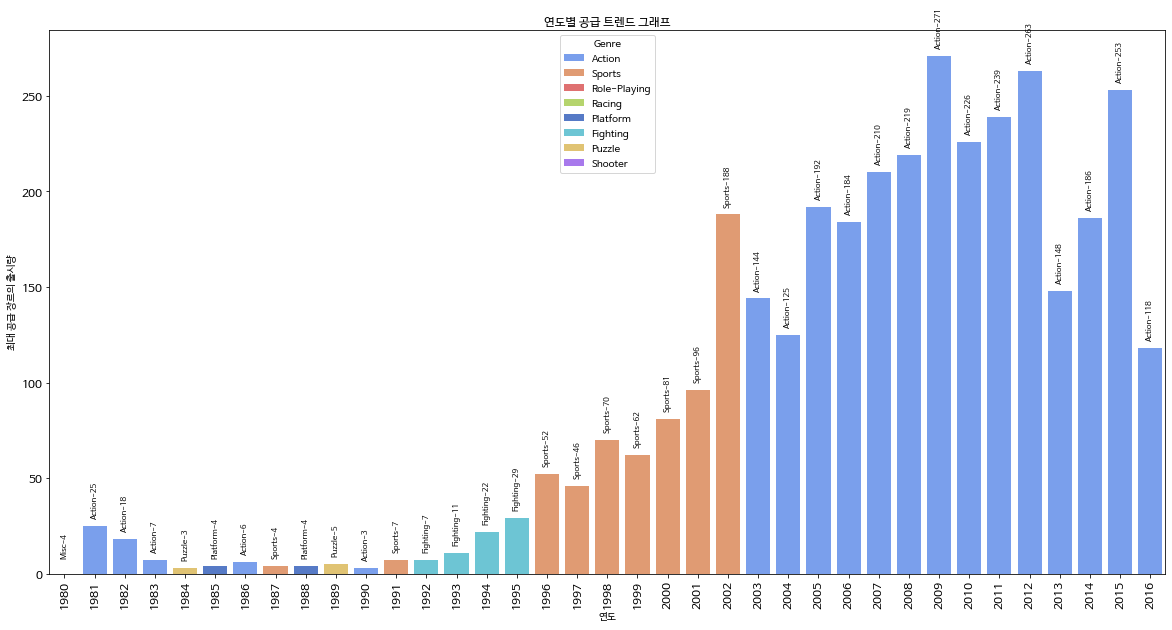

In [ ]:
import numpy as np, scipy.stats as st
genre = year_max_genre['Genre'].values
plt.figure(figsize=(20,10))

colors = ["#6799FF"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Count',hue='Genre', data=year_max_genre,hue_order=['Action'])
colors = ["#F29661"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Count',hue='Genre', data=year_max_genre,hue_order=['Sports'])
colors = ["#F15F5F"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Count',hue='Genre', data=year_max_genre,hue_order=['Role-Playing'])
colors = ["#BCE55C"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Count',hue='Genre', data=year_max_genre,hue_order=['Racing'])
colors = ["#4374D9"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Count',hue='Genre', data=year_max_genre,hue_order=['Platform'])
colors = ["#5CD1E5"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Count',hue='Genre', data=year_max_genre,hue_order=['Fighting'])
colors = ["#F2CB61"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Count',hue='Genre', data=year_max_genre,hue_order=['Puzzle'])
colors = ["#A566FF"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Count',hue='Genre', data=year_max_genre,hue_order=['Shooter'])


cnt = 0
for value in year_max_genre['Count']:
    year_barplot.text(x=cnt, y=value + 5, s=str(genre[cnt] + '-' + str(value)),
            color='black', size=8, rotation=90, ha='center')
    cnt+=1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.title('연도별 공급 그래프')
plt.xlabel('연도')
plt.ylabel('출시량')
plt.show()
# 공급 부분에서 최근 트렌드는 Action 장르임을 알 수 있다.

In [ ]:
year_max_sales = df.groupby(['Year', 'Genre'])['Sales_sum'].sum().reset_index()
year_sales_bool = year_max_sales.groupby(['Year'])['Sales_sum'].transform(max) == year_max_sales['Sales_sum']
year_max_sales = year_max_sales[year_sales_bool].reset_index(drop=True)
year_max_sales

,Year,Genre,Sales_sum
0,1980,Shooter,7.07
1,1981,Action,14.79
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10
5,1985,Platform,43.17
6,1986,Action,13.74
7,1987,Fighting,5.42
8,1988,Platform,27.73
9,1989,Puzzle,37.75


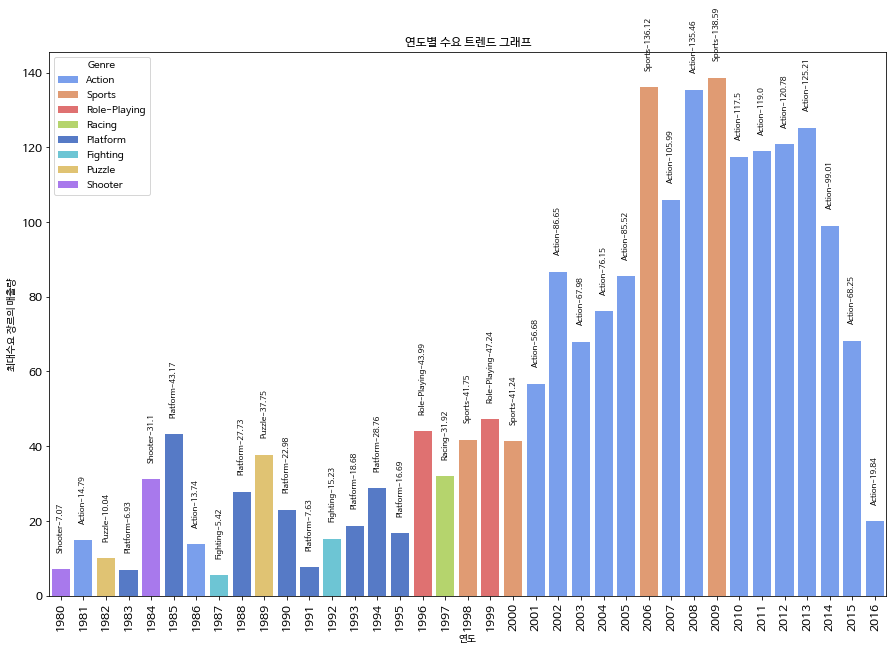

In [ ]:
genre = year_max_sales['Genre'].values
plt.figure(figsize=(15,10))

colors = ["#6799FF"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Action'])
colors = ["#F29661"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Sports'])
colors = ["#F15F5F"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Role-Playing'])
colors = ["#BCE55C"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Racing'])
colors = ["#4374D9"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Platform'])
colors = ["#5CD1E5"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Fighting'])
colors = ["#F2CB61"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Puzzle'])
colors = ["#A566FF"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Shooter'])



cnt = 0
for value in year_max_sales['Sales_sum']:
    year_barplot.text(x=cnt, y=value + 5, s=str(genre[cnt] + '-' + str(round(value,2))),
            color='black', size=8, rotation=90, ha='center')
    cnt+=1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('연도별 수요 그래프')
plt.xlabel('연도')
plt.ylabel('매출량')
plt.show()
# 수요 부분에서 최근 트렌드는 Action 장르임을 알 수 있다.

In [ ]:
# 출고량이 높은 게임에 대한 분석 및 시각화
# 2010년대 대상으로 분석
sales_top100 = df[df.Year > 2009].sort_values(by='Sales_sum' ,ascending=False)
sales_top100 = sales_top100.head(100).reset_index(drop=True)
sales_top100

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
2,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
...,...,...,...,...,...,...,...,...,...,...
95,Assassin's Creed IV: Black Flag,PS3,2013,Action,Ubisoft,1.33,1.71,0.13,0.73,3.90
96,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,Nintendo,0.67,0.49,2.62,0.11,3.89
97,The Elder Scrolls V: Skyrim,PC,2011,Role-Playing,Bethesda Softworks,1.15,2.09,0.00,0.64,3.88
98,Sports Champions,PS3,2010,Sports,Sony Computer Entertainment,2.12,1.14,0.10,0.51,3.87


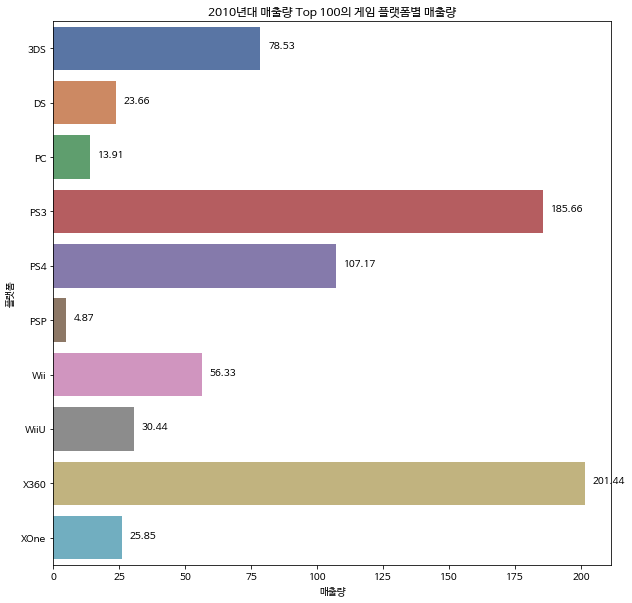

In [ ]:
top100_platform = sales_top100.groupby(['Platform'])['Sales_sum'].sum().reset_index()
platform = top100_platform['Platform'].values
plt.figure(figsize=(10, 10))
top100_platform_sales = sns.barplot(x ='Sales_sum', y='Platform', data=top100_platform)
cnt = 0
for value in top100_platform['Sales_sum']:
    top100_platform_sales.text(x=value + 3, y=cnt, s=str(round(value,2)),
            color='black', size=10)
    cnt+=1
plt.title('2010년대 매출량 Top 100의 게임 플랫폼별 매출량')
plt.xlabel('매출량')
plt.ylabel('플랫폼')
plt.show()
# 2010년도 들어서 출고량이 가장 많았던 게임 플랫폼은 PS3,PS4,X360 순이다.

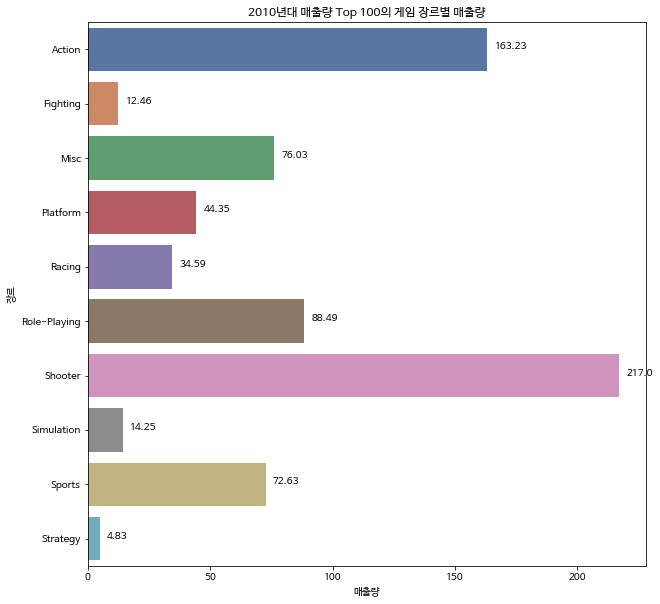

In [ ]:
top100_genre = sales_top100.groupby(['Genre'])['Sales_sum'].sum().reset_index()
genre = top100_genre['Genre'].values
plt.figure(figsize=(10, 10))
top100_genre_sales = sns.barplot(x ='Sales_sum', y='Genre', data=top100_genre)
cnt = 0
for value in top100_genre['Sales_sum']:
    top100_genre_sales.text(x=value + 3, y=cnt, s=str(round(value,2)),
            color='black', size=10)
    cnt+=1
plt.title('2010년대 매출량 Top 100의 게임 장르별 매출량')
plt.xlabel('매출량')
plt.ylabel('장르')
plt.show()
# 2010년도 들어서 출고량이 가장 많았던 게임 장르는 Shooter,Action,Sports 순이다.

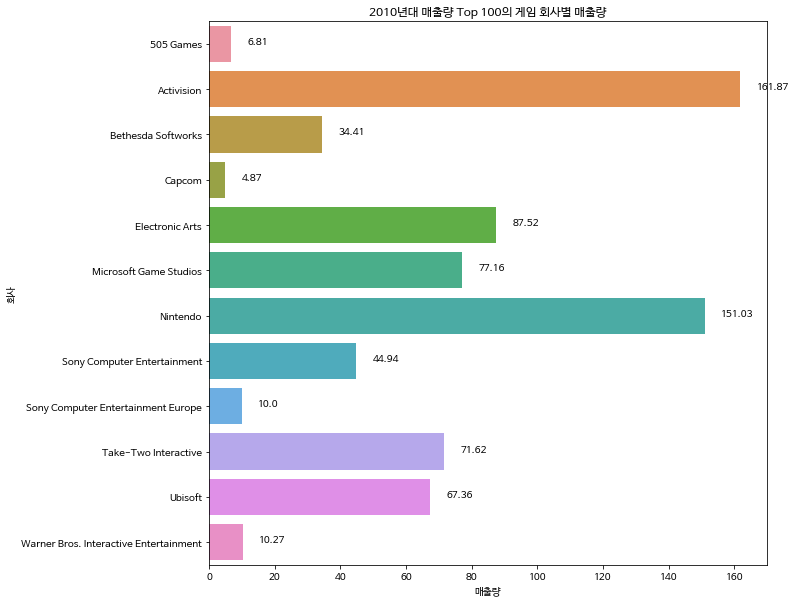

In [ ]:
top100_publisher = sales_top100.groupby(['Publisher'])['Sales_sum'].sum().reset_index()
publisher = top100_publisher['Publisher'].values
plt.figure(figsize=(10, 10))
top100_publisher_sales = sns.barplot(x ='Sales_sum', y='Publisher', data=top100_publisher)
cnt = 0
for value in top100_publisher['Sales_sum']:
    top100_publisher_sales.text(x=value + 5, y=cnt, s=str(round(value,2)),
            color='black', size=10)
    cnt+=1
plt.title('2010년대 매출량 Top 100의 게임 회사별 매출량')
plt.xlabel('매출량')
plt.ylabel('회사')
plt.show()
# 2010년도 들어서 출고량이 많았던 가장 회사는 Activision,Nintendo,Electronic Arts 순이다.

In [ ]:
Genre_filter = (df.Genre == 'Action') & (df.Year > 2009)
df_action = df.loc[Genre_filter].reset_index(drop = True)
df_action

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08
1,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,0.06,0.08,0.16,0.03,0.33
2,Rango: The Video Game,Wii,2011,Action,Electronic Arts,0.08,0.04,0.00,0.01,0.13
3,NBA 2K11,PC,2010,Action,Take-Two Interactive,0.18,0.00,0.00,0.01,0.19
4,Harry Potter and the Deathly Hallows - Part 1,PS3,2010,Action,Electronic Arts,0.13,0.21,0.00,0.08,0.42
...,...,...,...,...,...,...,...,...,...,...
1428,Kimikare: New Semester,PSP,2012,Action,Idea Factory,0.00,0.00,0.02,0.00,0.02
1429,GoldenEye 007 (2010),DS,2010,Action,Activision,0.11,0.03,0.00,0.01,0.15
1430,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08
1431,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02,0.27


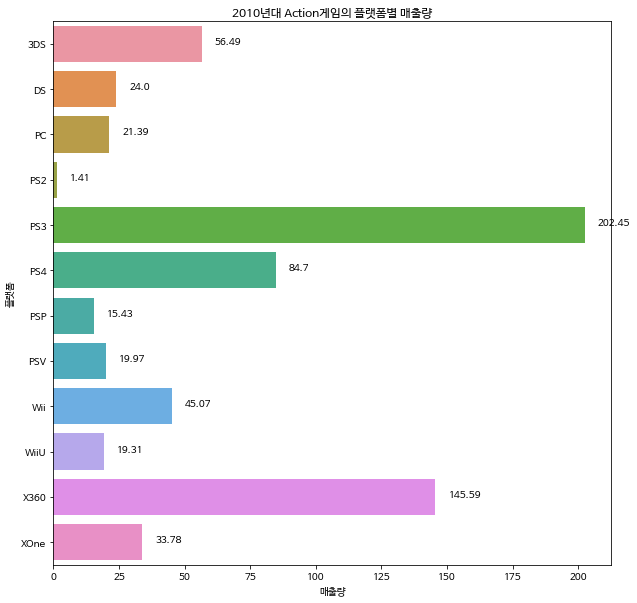

In [ ]:
df_action_platform = df_action.groupby(['Platform'])['Sales_sum'].sum().reset_index()
platform = df_action_platform['Platform'].values
plt.figure(figsize=(10, 10))
df_action_platform_sales = sns.barplot(x ='Sales_sum', y='Platform', data=df_action_platform)
cnt = 0
for value in df_action_platform['Sales_sum']:
    df_action_platform_sales.text(x=value + 5, y=cnt, s=str(round(value,2)),
            color='black', size=10)
    cnt+=1
plt.title('2010년대 Action게임의 플랫폼별 매출량')
plt.xlabel('매출량')
plt.ylabel('플랫폼')
plt.show()

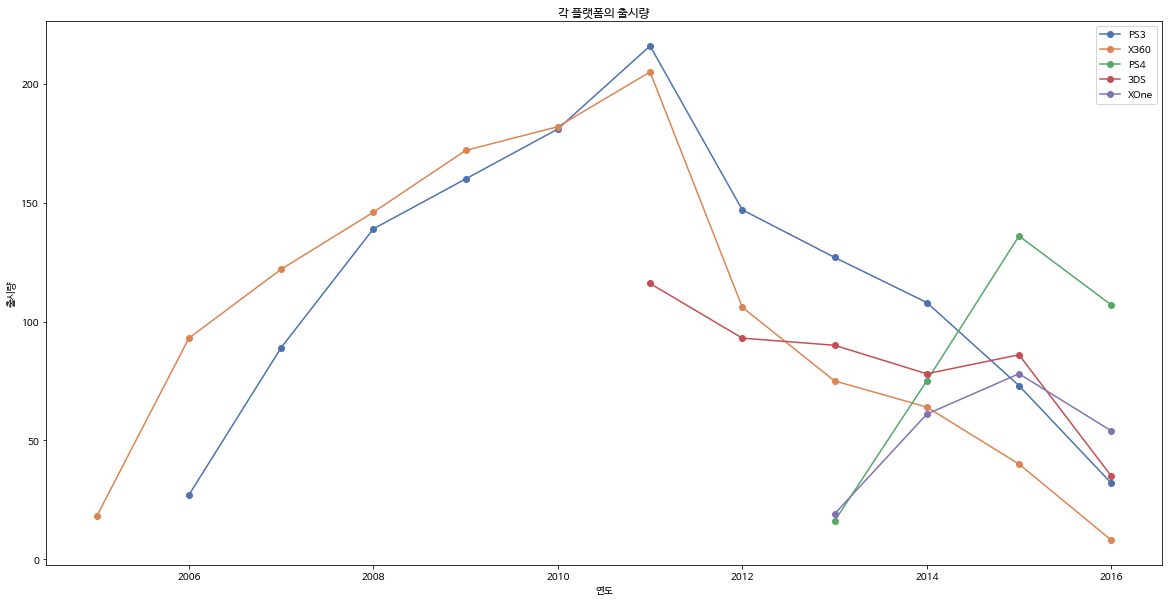

In [ ]:
sns.set_palette('deep')

# 연도별 플랫폼 출시 비율 그래프 형태 (꺾은선)
plt.figure(figsize=(20, 10))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)

PS3_filter = df.Platform == 'PS3'
df_PS3 = df.loc[PS3_filter]
df_PS3 = df_PS3.groupby(['Year', 'Platform']).size().reset_index(name='Count')
plt.plot(df_PS3['Year'], df_PS3['Count'],marker='o',label = 'PS3')

X360_filter = df.Platform == 'X360'
df_X360 = df.loc[X360_filter]
df_X360 = df_X360.groupby(['Year', 'Platform']).size().reset_index(name='Count')
plt.plot(df_X360['Year'], df_X360['Count'],marker='o',label = 'X360')

PS4_filter = df.Platform == 'PS4'
df_PS4 = df.loc[PS4_filter]
df_PS4 = df_PS4.groupby(['Year', 'Platform']).size().reset_index(name='Count')
plt.plot(df_PS4['Year'], df_PS4['Count'],marker='o',label = 'PS4')

DS3_filter = df.Platform == '3DS'
df_3DS = df.loc[DS3_filter]
df_3DS = df_3DS.groupby(['Year', 'Platform']).size().reset_index(name='Count')
plt.plot(df_3DS['Year'], df_3DS['Count'],marker='o',label = '3DS')

XOne_filter = df.Platform == 'XOne'
df_XOne = df.loc[XOne_filter]
df_XOne = df_XOne.groupby(['Year', 'Platform']).size().reset_index(name='Count')
plt.plot(df_XOne['Year'], df_XOne['Count'],marker='o',label = 'XOne')
plt.legend()

plt.title('각 플랫폼의 출시량')
plt.xlabel('연도')
plt.ylabel('출시량')
plt.show()

# PS4를 Platform으로 선정한다.

In [ ]:
Platform_filter = (df_action.Platform == 'PS4') # 조건식 작성
df_action_ps4 = df_action.loc[Platform_filter].reset_index(drop = True)
df_action_ps4

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Warriors Orochi 3,PS4,2014,Action,Tecmo Koei,0.04,0.05,0.04,0.02,0.15
1,Let's Sing 2016,PS4,2015,Action,FuRyu Corporation,0.02,0.00,0.00,0.01,0.03
2,Terraria,PS4,2014,Action,505 Games,0.00,0.05,0.01,0.01,0.07
3,Hitman (2016),PS4,2016,Action,Square Enix,0.00,0.04,0.00,0.01,0.05
4,Devil May Cry 4,PS4,2015,Action,Capcom,0.01,0.00,0.08,0.00,0.09
...,...,...,...,...,...,...,...,...,...,...
116,TrackMania Turbo,PS4,2016,Action,Ubisoft,0.03,0.24,0.00,0.05,0.32
117,Kamen Rider: Battride War Genesis,PS4,2016,Action,Namco Bandai Games,0.00,0.00,0.05,0.00,0.05
118,Final Fantasy XIV: Heavensward,PS4,2015,Action,Square Enix,0.00,0.05,0.06,0.01,0.12
119,This War of Mine,PS4,2016,Action,Deep Silver,0.00,0.01,0.00,0.00,0.01


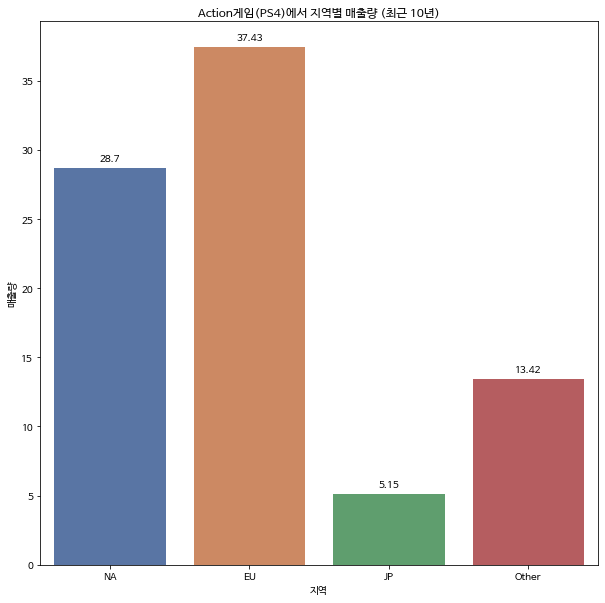

In [ ]:
plt.figure(figsize=(10,10))
locate_NA = df_action_ps4['NA_Sales'].sum()
locate_EU = df_action_ps4['EU_Sales'].sum()
locate_JP = df_action_ps4['JP_Sales'].sum()
locate_Other = df_action_ps4['Other_Sales'].sum()
locate_group = pd.DataFrame({'locate':['NA','EU','JP','Other'],'Sales':[locate_NA, locate_EU,locate_JP,locate_Other]})
locate_barplot = sns.barplot(x='locate', y='Sales',data=locate_group)
Sales = locate_group['Sales'].values
cnt = 0
for value in locate_group['Sales']:
    locate_barplot.text(x=cnt, y=value+0.5, s=str(str(round(value,2))),
            color='black', size=10, ha='center')
    cnt+=1
plt.title('2010년대 Action게임(PS4)에서 지역별 매출량')
plt.xlabel('지역')
plt.ylabel('매출량')
plt.show()
# EU를 대상으로한 게임을 설계한다.

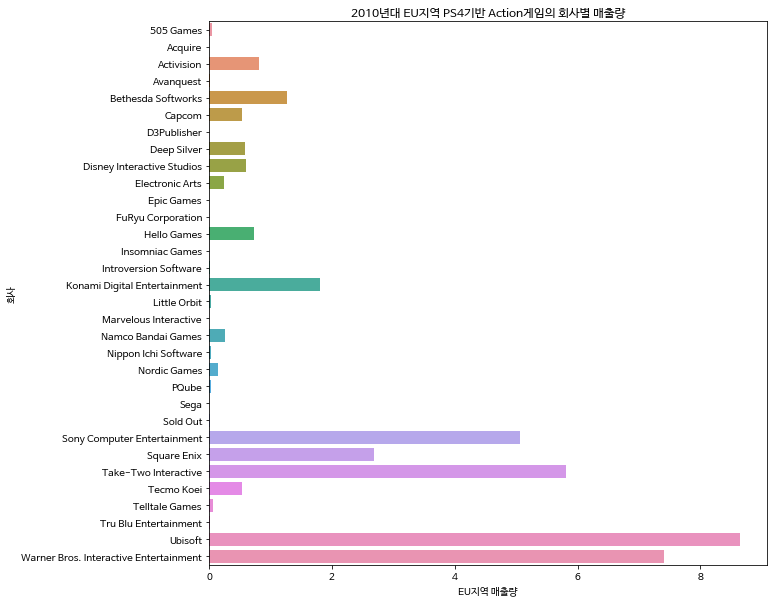

In [ ]:
# 연도별 장르 갯수 추출
df_action_ps4_pub = df_action_ps4.groupby(['Publisher'])['EU_Sales'].sum().reset_index()
plt.figure(figsize=(10, 10))
res_barplot = sns.barplot(x='EU_Sales', y='Publisher',data=df_action_ps4_pub)
plt.title('2010년대 EU지역 PS4기반 Action게임의 회사별 매출량')
plt.xlabel('EU지역 매출량')
plt.ylabel('회사')
plt.show()
# Ubisoft를 모티브로 하겠다.

In [ ]:
# PS4 플랫폼에서 EU지역을 대상으로 Action장르 게임을 Ubisoft회사를 모티브로 하여 게임을 설계한다.